# $$ 银行产品认购预测 $$

## 一、选题背景介绍   
在金融市场竞争中，银行需精准预测客户购买金融产品的行为以提升业务。此预测受个人特征、历史互动及市场环境等多重因素影响。为应对挑战，本实验计划采用机器学习技术，基于银行数据集（train.csv），构建两种模型预测客户购买意向（subscribe：yes or no）。通过评估模型准确性和泛化能力，选择最优模型对测试数据集（test_submit.csv）进行预测，以支持银行制定精准营销策略。


## 二、数据准备和分析

### 1、导入库和文件

In [1]:
# 导入库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler  # 引入上采样器

In [2]:
# 读取csv文件
train_df = pd.read_csv(r'D:/数据挖掘/期末课程设计/分类/train.csv', encoding='gbk')
test_df = pd.read_csv(r'D:/数据挖掘/期末课程设计/分类/test_submit.csv', encoding='gbk')

### 2、数据探索

In [3]:
# （1）查看数据量
print("查看训练集数据量:\n", train_df)
print("查看预测集数据量:\n", test_df)
print("----------------------------------------------")

查看训练集数据量:
           id  age           job   marital            education  default  \
0          1   51        admin.  divorced  professional.course       no   
1          2   50      services   married          high.school  unknown   
2          3   48   blue-collar  divorced             basic.9y       no   
3          4   26  entrepreneur    single          high.school      yes   
4          5   45        admin.    single    university.degree       no   
...      ...  ...           ...       ...                  ...      ...   
19995  19996   32    technician    single  professional.course       no   
19996  19997   28   blue-collar   married             basic.6y       no   
19997  19998   49   blue-collar   married             basic.4y       no   
19998  19999   34      services    single          high.school       no   
19999  20000   38    unemployed    single          high.school       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0         yes  yes

#### 训练集数据量20000条，预测集数据量2500条。

In [4]:
# （2）查看数据维度
print("查看训练集数据维度: ", train_df.shape)
print("查看预测集数据维度: ", test_df.shape)
print("----------------------------------------------")

查看训练集数据维度:  (20000, 22)
查看预测集数据维度:  (2500, 22)
----------------------------------------------


In [5]:
# （3）查看数据类型
print("查看训练集数据类型:")
print(train_df.info())
print("查看预测集数据类型:")
print(test_df.info())
print("----------------------------------------------")

查看训练集数据类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   job               20000 non-null  object 
 3   marital           20000 non-null  object 
 4   education         20000 non-null  object 
 5   default           20000 non-null  object 
 6   housing           20000 non-null  object 
 7   loan              20000 non-null  object 
 8   contact           20000 non-null  object 
 9   month             20000 non-null  object 
 10  day_of_week       20000 non-null  object 
 11  duration          20000 non-null  int64  
 12  campaign          20000 non-null  int64  
 13  pdays             20000 non-null  int64  
 14  previous          20000 non-null  int64  
 15  poutcome          20000 non-null  object 
 16  emp_var_rate      20000 non-n

#### 由数据条形分布图可以看出，该数据集存在大量分类变量，部分特征呈正态分布。

### 3、数据清洗及预处理

In [6]:
# 分离训练集特征和标签
X = train_df.drop('subscribe', axis=1)
y = train_df['subscribe']

In [7]:
# 1、剔除无关变量
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)
# 查看变量
print("查看训练集变量: \n", train_df.columns.tolist())
print("查看预测集变量: \n", test_df.columns.tolist())
print("----------------------------------------------")

查看训练集变量: 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe']
查看预测集变量: 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe']
----------------------------------------------


In [8]:
# 2. 缺失值处理
print("2、缺失值处理")
# 查看缺失值比例
print("查看训练集缺失值比例\n", train_df.isnull().sum()/len(train_df))
print("查看预测集缺失值比例\n", test_df.isnull().sum()/len(test_df))
print("----------------------------------------------")

2、缺失值处理
查看训练集缺失值比例
 age                 0.0
job                 0.0
marital             0.0
education           0.0
default             0.0
housing             0.0
loan                0.0
contact             0.0
month               0.0
day_of_week         0.0
duration            0.0
campaign            0.0
pdays               0.0
previous            0.0
poutcome            0.0
emp_var_rate        0.0
cons_price_index    0.0
cons_conf_index     0.0
lending_rate3m      0.0
nr_employed         0.0
subscribe           0.0
dtype: float64
查看预测集缺失值比例
 age                 0.0
job                 0.0
marital             0.0
education           0.0
default             0.0
housing             0.0
loan                0.0
contact             0.0
month               0.0
day_of_week         0.0
duration            0.0
campaign            0.0
pdays               0.0
previous            0.0
poutcome            0.0
emp_var_rate        0.0
cons_price_index    0.0
cons_conf_index     0.0
lending_rate3m   

#### 训练集与预测集数据类型均无缺失值，不需再进行处理。

In [9]:
# ********************* 对训练数据进行上采样 ************************************
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X, y)
# 将上采样后的数据转换为DataFrame
X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.Series(y_resampled)

In [10]:
# 3、将分类变量转换为数值变量（独热编码），并标准化数值变量
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_index',
                    'cons_conf_index', 'lending_rate3m', 'nr_employed']
categorical_features = ['job', 'marital', 'default', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train_preprocessed = preprocessor.fit_transform(X)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)

print("预处理后的数据前5行:")
print(X_train_preprocessed.head())
print("----------------------------------------------")

预处理后的数据前5行:
         0         1         2         3         4         5         6   \
0  0.653693  2.417206 -0.369324 -1.781220  0.325209  1.044592 -0.950873   
1  0.584472  2.483841 -0.369324 -0.929339  0.325209 -0.823722  1.012787   
2  0.446029 -0.737349 -0.472394  0.817015 -0.200904 -0.823722  1.012787   
3 -1.076845 -0.604078  2.207436  0.734667 -0.727017  1.044592  1.279588   
4  0.238364  1.394279 -0.369324 -1.417751  1.377434 -1.757879 -1.303051   

         7         8         9   ...   42   43   44   45   46   47   48   49  \
0  0.682541 -1.378899  0.571706  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1 -0.140158  0.638488 -0.852583  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2 -0.817867 -0.892565 -0.574528  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3  0.679282  1.274926  0.589906  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  0.959489 -1.090701 -1.376421  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    50   51  
0  0.0  0.0  
1  1.0  0.0  
2  0.0  0.0  


In [11]:
# 4. 异常值处理
# 筛选出数值型列
numeric_cols = X_train_preprocessed.select_dtypes(include=['number']).columns

# 初始化异常值计数Series（使用转换后的列名）
outlier_counts_before = pd.Series(index=numeric_cols, dtype=int)
outlier_counts_after = pd.Series(index=numeric_cols, dtype=int)

# 处理异常值
for col in numeric_cols:
    Q1 = X_train_preprocessed[col].quantile(0.25)
    Q3 = X_train_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 识别异常值
    outliers = (X_train_preprocessed[col] < lower_bound) | (X_train_preprocessed[col] > upper_bound)
    outlier_counts_before[col] = outliers.sum()

    # 用中位数替换异常值
    X_train_preprocessed[col] = X_train_preprocessed[col].mask(outliers, X_train_preprocessed[col].median())

    # 验证处理后是否还有异常值
    outliers_after = (X_train_preprocessed[col] < lower_bound) | (X_train_preprocessed[col] > upper_bound)
    outlier_counts_after[col] = outliers_after.sum()

# 打印原始和处理后的异常值计数
print("原始异常值计数:", outlier_counts_before)
print("处理后异常值计数:", outlier_counts_after)
print("----------------------------------------------")

原始异常值计数: 0     1272.0
1     1381.0
2     5084.0
3        0.0
4     1963.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10    8668.0
11    6209.0
12    1312.0
13    1052.0
14    2526.0
15    2256.0
16    1361.0
17    2854.0
18    1420.0
19    5335.0
20    1185.0
21     562.0
22    4144.0
23       0.0
24       0.0
25    1002.0
26    7552.0
27    6242.0
28    1310.0
29       0.0
30    1853.0
31       0.0
32       0.0
33       0.0
34    2907.0
35    4909.0
36     674.0
37    5431.0
38    4186.0
39    1378.0
40       0.0
41    3296.0
42    1652.0
43    1371.0
44    6518.0
45    6788.0
46    7475.0
47    7046.0
48    6913.0
49    7280.0
50       0.0
51    6453.0
dtype: float64
处理后异常值计数: 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0


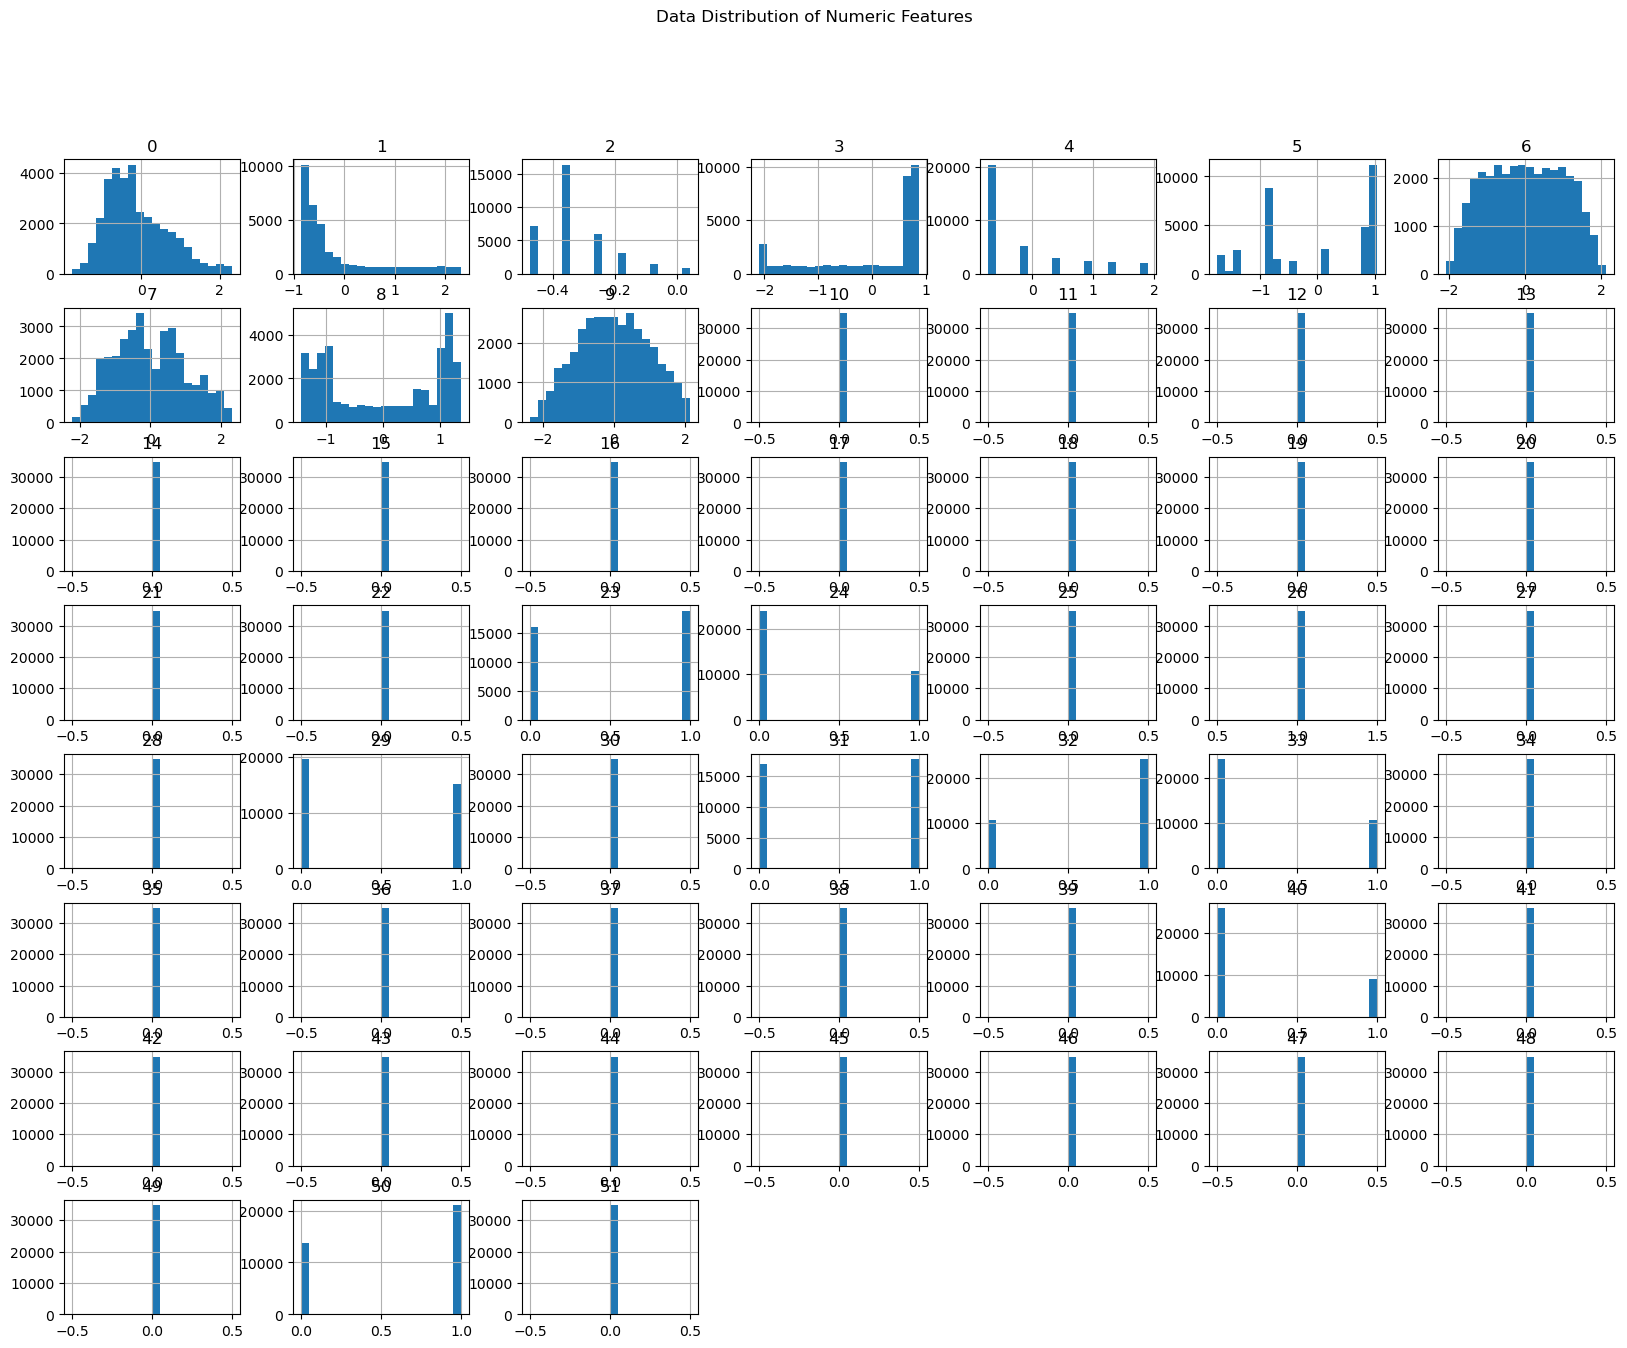

In [12]:
# 查看数据分布
# 绘制数据分布图
def plot_data_distribution(df, numeric_cols):
    df_numeric = df[numeric_cols]
    df_numeric.hist(bins=20, figsize=(20, 15))
    plt.suptitle('Data Distribution of Numeric Features')
    plt.show()

plot_data_distribution(X_train_preprocessed, numeric_cols)

### 三、模型训练
    本次实验使用了两个机器学习模型来对数据进行训练和预测：逻辑回归（Logistic Regression）和随机森林（Random Forest）。下面是对这两个模型的简单介绍、原理、参数设置以及超参数调参的概述。
1. 逻辑回归（Logistic Regression）
（1）原理：
逻辑回归是一种广泛用于分类问题的线性模型，特别适用于二分类问题。逻辑回归通过应用一个逻辑函数（通常是Sigmoid函数）将线性回归的输出映射到0和1之间，从而得到属于某个类别的概率。
（2）参数设置：
max_iter=10000：最大迭代次数，用于确保优化算法收敛。
solver='liblinear'：用于优化问题的算法。liblinear是专为小数据集设计的线性分类器，支持L1正则化。
（3）超参数调参：使用了3认设置。

2. 随机森林（Random Forest）
（1）原理：
随机森林是一种集成学习方法，它通过构建多个决策树并输出这些树的多数投票（或平均预测，对于回归问题）来提高预测准确性和鲁棒性。随机森林通过在训练每个树时随机选择特征子集和样本子集来减少过拟合的风险。
（2）参数设置：
n_estimators=100：森林中树的数量。更多的树通常会提高性能，但也会增加计算成本。
random_state=42：随机数生成器的种子，用于确保结果的可重复性。
（3）超参数调参：
随机森林的超参数包括树的数量（n_estimators）、最大深度（max_depth）、最小样本分裂数（min_samples_split）、最小叶节点样本数（min_samples_leaf）等。在这个例子中，只设置了树的数量，其他参数使用了默认值。在实际应用中，可以通过网格搜索（Grid Search）或随机搜索（Random Search）等方法对这些参数进行优化。


Logistic Regression Accuracy: 0.6947322970639033, F1-score: 0.6942071593780875
----------------------------------------------
Random Forest Accuracy: 0.9719343696027634, F1-score: 0.971917189049272
----------------------------------------------
绘制模型性能评估图（混淆矩阵）


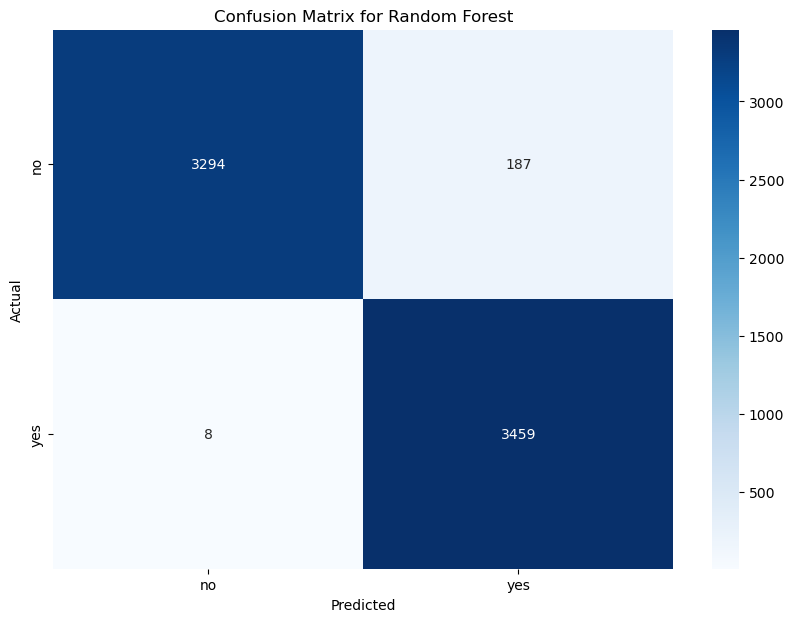

In [13]:
# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y, test_size=0.2, random_state=42)

# 逻辑回归模型
logreg_pipeline = Pipeline(steps=[('classifier', LogisticRegression(max_iter=10000, solver='liblinear'))])
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
f1_logreg = f1_score(y_val, y_pred_logreg, average='weighted')
print(f'Logistic Regression Accuracy: {accuracy_logreg}, F1-score: {f1_logreg}')
print("----------------------------------------------")

# 随机森林模型
rf_pipeline = Pipeline(steps=[('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf, average='weighted')
print(f'Random Forest Accuracy: {accuracy_rf}, F1-score: {f1_rf}')
print("----------------------------------------------")

# 模型性能评估图（混淆矩阵）
print("绘制模型性能评估图（混淆矩阵）")
conf_matrix = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['subscribe'].unique(),
            yticklabels=train_df['subscribe'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# 随机森林模型性能更好，使用它进行预测
best_model = rf_pipeline.named_steps['classifier']

# 对测试集进行相同的预处理步骤
test_X_preprocessed = preprocessor.transform(test_df)

# 使用训练好的随机森林模型进行预测
y_pred_test_rf = best_model.predict(test_X_preprocessed)

# 将预测结果转换为DataFrame格式
submission = pd.DataFrame({'id': pd.read_csv(r'D:/数据挖掘/期末课程设计/分类/test_submit.csv', encoding='gbk')['id'],
                           'subscribe': y_pred_test_rf})

（1）处理异常值后，两个模型准确率提升而F1-score下降，这是因为在数据不平衡的情况下，即正类和负类的样本数量差异很大时，模型可能将所有样本预测为多数类，从而得到很高的准确率，但这并不意味着模型在识别少数类上表现良好，此时，F1-score的下降可能反映了模型在少数类上的性能不佳，因为F1-score同时考虑了精确率和召回率，对类别不平衡更为敏感。

（2）上采样后，逻辑回归模型的准确率和F1-score下降，但是随机森林模型的准确率和F1-score明显提升，达到了95%以上，说明该模型为最佳模型，使用该模型进行预测

总结:本次项目首先使用逻辑回归和随机森林模型对数据进行训练，并通过验证集上的准确率来评估它们的性能。结果显示，随机森林模型的性能更好，因此选择它作为最终模型进行预测。然后，对测试集进行了与训练集相同的预处理步骤，并使用训练好的随机森林模型进行了预测。
处理异常值后，两个模型准确率提升而F1-score下降，这是因为在数据不平衡的情况下，即正类和负类的样本数量差异很大时，模型可能将所有样本预测为多数类，从而得到很高的准确率，但这并不意味着模型在识别少数类上表现良好，此时，F1-score的下降可能反映了模型在少数类上的性能不佳，因为F1-score同时考虑了精确率和召回率，对类别不平衡更为敏感。

### 5、预测结果保存

In [14]:
# 将预测结果保存到CSV文件中
# submission.to_csv(r'D:/数据挖掘/期末课程设计/分类/submission_rf.csv', index=False, encoding='gbk')
print("预测结果已保存")

预测结果已保存
